In [103]:
import os
import subprocess
import pandas as pd
import requests

In [ ]:
res = subprocess.check_output(['pip', 'list', '--outdated'], text=True)

In [14]:
print(res)

Package                  Version Latest  Type
------------------------ ------- ------- -----
antlr4-python3-runtime   4.9.3   4.11.1  wheel
argcomplete              1.12.3  2.0.0   wheel
asttokens                2.2.0   2.2.1   wheel
atpublic                 3.0.1   3.1.1   wheel
attrs                    22.1.0  22.2.0  wheel
azure-datalake-store     0.0.51  0.0.52  wheel
Babel                    2.9.1   2.11.0  wheel
billiard                 3.6.4.0 4.1.0   wheel
charset-normalizer       2.0.4   3.0.1   wheel
cryptography             38.0.1  38.0.4  wheel
distro                   1.6.0   1.8.0   wheel
dpath                    2.0.8   2.1.3   wheel
dvc                      0.0.0   2.38.1  wheel
dvc-data                 0.28.3  0.28.4  wheel
dvc-gdrive               2.19.0  2.19.1  wheel
dvc-render               0.0.14  0.0.17  wheel
dvc-task                 0.1.6   0.1.8   wheel
dvclive                  1.0.3   1.2.2   wheel
filelock                 3.8.0   3.8.2   wheel
flit_core     

In [70]:
cmd = ['pip', 'list', '--outdated']

In [144]:
import subprocess
import pandas as pd

cmd = ['pip', 'list']
a = subprocess.Popen(cmd, stdout=subprocess.PIPE)  # text=True then no need to decode bytes to str

from io import StringIO

b = StringIO(a.communicate()[0].decode('utf-8'))

df = pd.read_csv(b, sep="\s+")

In [146]:
df

,Package,Version
0,------------------------,-----------
1,adal,1.2.7
2,adlfs,2022.11.2
3,aiohttp,3.8.3
4,aiohttp-retry,2.8.3
...,...,...
249,widgetsnbextension,3.5.2
250,yarl,1.8.1
251,zc.lockfile,2.0
252,zipp,3.11.0


In [166]:
import pandas as pd
from subprocess import Popen, PIPE

with Popen('pip list --outdated',
           shell=True,
           stdout=PIPE) as process:
    df = pd.read_csv(process.stdout, sep='\s+')

In [167]:
df.drop(['Type', 'Version'], axis=1, inplace=True)
df.drop(index=[0], axis=0, inplace=True)

In [168]:
df = df.set_index('Package')
df

,Latest
Package,
antlr4-python3-runtime,4.11.1
argcomplete,2.0.0
asttokens,2.2.1
atpublic,3.1.1
attrs,22.2.0
...,...
traitlets,5.8.0
urllib3,1.26.13
wheel,0.38.4


In [177]:
with Popen('pip list',
           shell=True,
           stdout=PIPE) as process:
    df1 = pd.read_csv(process.stdout, sep='\s+')
df1.drop(index=[0], axis=0, inplace=True)
df1 = df1.rename(columns = {'Version':'Latest'})
df1 = df1.set_index('Package')
df1

,Latest
Package,
adal,1.2.7
adlfs,2022.11.2
aiohttp,3.8.3
aiohttp-retry,2.8.3
aiosignal,1.3.1
...,...
widgetsnbextension,3.5.2
yarl,1.8.1
zc.lockfile,2.0


In [181]:
requirements = pd.read_csv('requirements.txt', sep='==', header=None, names=['Package','Version'])

/tmp/ipykernel_22993/2715344322.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  requirements = pd.read_csv('requirements.txt', sep='==', header=None, names=['Package','Version'])


In [182]:
requirements = requirements.set_index('Package')

In [183]:
dependencies = requirements.join(df1)
dependencies

,Version,Latest
Package,,
click,7.1.2,8.1.3
cycler,0.10.0,0.11.0
Flask,1.1.2,2.2.2
gunicorn,20.0.4,NaN
itsdangerous,1.1.0,2.1.2
Jinja2,2.11.3,3.1.2
joblib,1.0.1,1.2.0
kiwisolver,1.3.1,1.4.4
MarkupSafe,1.1.1,2.1.1


In [184]:
for p in df.index:
    if p in dependencies.index:
        dependencies.at[p, 'Latest'] = df.at[p,'Latest']

In [186]:
dependencies.dropna()

,Version,Latest
Package,,
click,7.1.2,8.1.3
cycler,0.10.0,0.11.0
Flask,1.1.2,2.2.2
itsdangerous,1.1.0,2.1.2
Jinja2,2.11.3,3.1.2
joblib,1.0.1,1.2.0
kiwisolver,1.3.1,1.4.4
MarkupSafe,1.1.1,2.1.1
matplotlib,3.3.4,3.6.2


In [2]:
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

from diagnostics import model_predictions
from ingestion import read_csv

###############Load config.json and get path variables
with open('config.json','r') as f:
    config = json.load(f) 

dataset_csv_path = os.path.join(config['output_folder_path']) 
model_path = os.path.join(config['output_model_path'])
test_data_path = os.path.join(config['test_data_path'])

In [25]:
# Define Data
from diagnostics import (model_predictions, dataframe_summary, missing_data, 
                        execution_time, outdated_packages_list)

# Additional Statistics
# compute classification report
cr = metrics.classification_report(y, yhat)
# Collect statistics
statistics = dataframe_summary()
missingdata = missing_data()
timings = execution_time()
dependencies = outdated_packages_list()
# collect ingested files
filepath = os.path.join(dataset_csv_path,'ingestedfiles.txt')
with open(filepath, 'r') as f:
    ingestedfiles = ast.literal_eval(f.read())

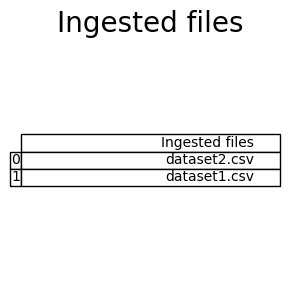

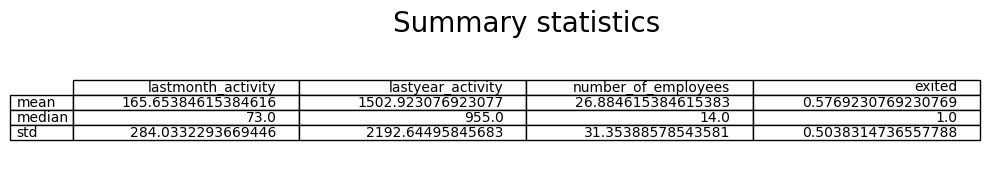

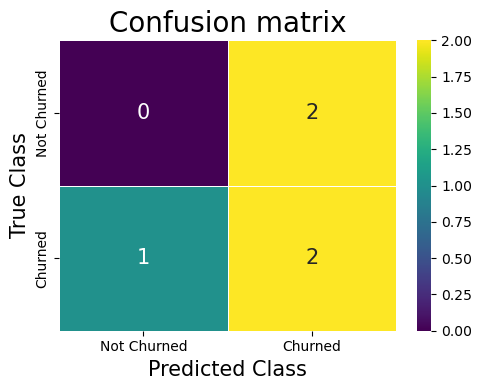

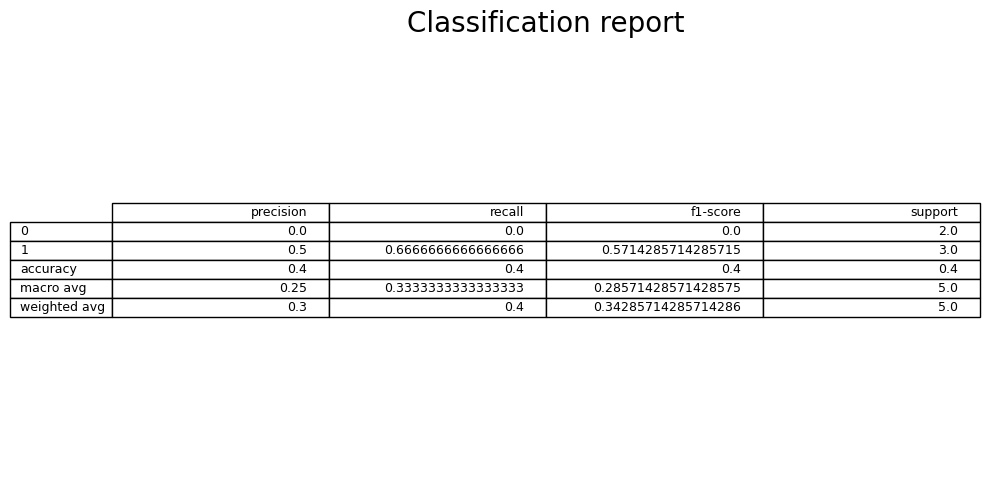

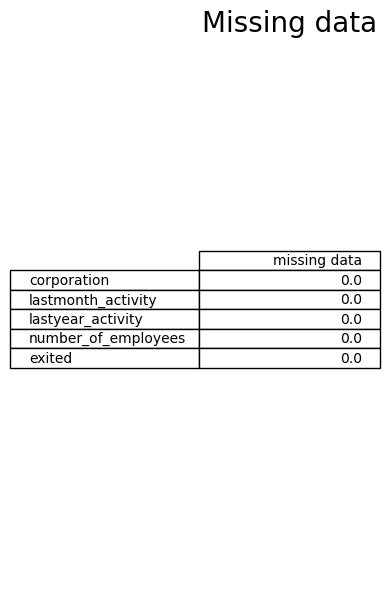

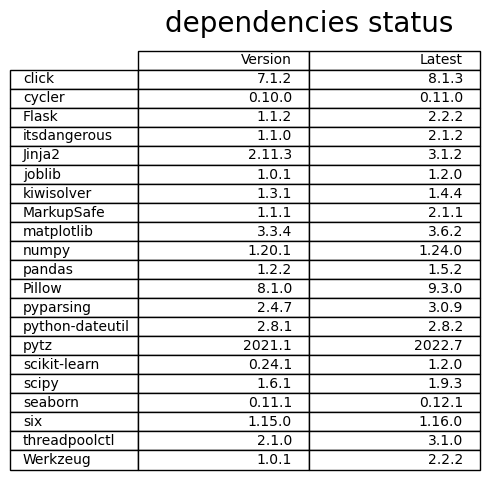

In [33]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

ingestedfiles = pd.DataFrame(ingestedfiles, columns=['Ingested files'])
col_names = ingestedfiles.columns.tolist()
data = ingestedfiles.values
rowLabels = ingestedfiles.index.tolist()
# Plot table
fig, ax = plt.subplots(1, figsize=(3,3))
plt.title('Ingested files', fontsize = 20)
ax.axis('off')
table = plt.table(cellText=data, colLabels=col_names, loc='center',colLoc='right', rowLabels=rowLabels)
plt.tight_layout()

col_names = ['lastmonth_activity','lastyear_activity','number_of_employees','exited']
data = np.array(statistics).reshape(3,4)
# Plot table
fig, ax = plt.subplots(1, figsize=(10,2))
plt.title('Summary statistics', fontsize = 20)
ax.axis('off')
table = plt.table(cellText=data, colLabels=col_names, loc='center',colLoc='right',rowLabels=['mean','median','std'])

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

import seaborn as sns
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot=True,cmap='viridis', fmt='d', linewidths=.5, annot_kws={"fontsize":15})
plt.xlabel('Predicted Class', fontsize = 15) 
ax.xaxis.set_ticklabels(['Not Churned', 'Churned'])
plt.ylabel('True Class', fontsize = 15)
ax.yaxis.set_ticklabels(['Not Churned', 'Churned'])
plt.title('Confusion matrix', fontsize = 20)
savepath = os.path.join(model_path,'confusionmatrix.png')
#fig1.savefig(savepath)


report = metrics.classification_report(y, yhat, output_dict=True)
df = pd.DataFrame(report).transpose()
col_names = df.columns.tolist()
data = df.values
rowLabels = df.index.tolist()
# Plot table
fig, ax = plt.subplots(1, figsize=(10,5))
ax.axis('off')
table = plt.table(cellText=data, colLabels=col_names, loc='center',colLoc='right',rowLabels=rowLabels)
plt.title('Classification report', fontsize = 20)
plt.tight_layout()


df = pd.DataFrame(data=missingdata, index = dataset.columns.tolist(), columns=['missing data'])
col_names = df.columns.tolist()
data = df.values
rowLabels = df.index.tolist()
# Plot table
fig, ax = plt.subplots(1, figsize=(4,6))
ax.axis('off')
table = plt.table(cellText=data, colLabels=col_names, loc='center',colLoc='right',rowLabels=rowLabels)
plt.title('Missing data', fontsize = 20)
plt.tight_layout()



col_names = dependencies.columns.tolist()
data = dependencies.values
rowLabels = dependencies.index.tolist()
# Plot table
fig, ax = plt.subplots(1, figsize=(5,5))
plt.title('dependencies status', fontsize = 20)
ax.axis('off')
table = plt.table(cellText=data, colLabels=col_names, loc='center',colLoc='right',rowLabels=rowLabels)
plt.tight_layout()



def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "multi.pdf"
save_multi_image(filename)

In [77]:
dependencies.to_records()

rec.array([('click', '7.1.2', '8.1.3'), ('cycler', '0.10.0', '0.11.0'),
           ('Flask', '1.1.2', '2.2.2'),
           ('itsdangerous', '1.1.0', '2.1.2'),
           ('Jinja2', '2.11.3', '3.1.2'), ('joblib', '1.0.1', '1.2.0'),
           ('kiwisolver', '1.3.1', '1.4.4'),
           ('MarkupSafe', '1.1.1', '2.1.1'),
           ('matplotlib', '3.3.4', '3.6.2'),
           ('numpy', '1.20.1', '1.24.0'), ('pandas', '1.2.2', '1.5.2'),
           ('Pillow', '8.1.0', '9.3.0'), ('pyparsing', '2.4.7', '3.0.9'),
           ('python-dateutil', '2.8.1', '2.8.2'),
           ('pytz', '2021.1', '2022.7'),
           ('scikit-learn', '0.24.1', '1.2.0'),
           ('scipy', '1.6.1', '1.9.3'), ('seaborn', '0.11.1', '0.12.1'),
           ('six', '1.15.0', '1.16.0'),
           ('threadpoolctl', '2.1.0', '3.1.0'),
           ('Werkzeug', '1.0.1', '2.2.2')],
          dtype=[('Package', 'O'), ('Version', 'O'), ('Latest', 'O')])

In [119]:
URL = "http://127.0.0.1:8000"

###################Load config.json and get path variables
with open('config.json','r') as f:
    config = json.load(f) 

test_data_path = os.path.join(config['test_data_path'])
model_path = os.path.join(config['output_model_path']) 

filepath = os.path.join(test_data_path,'testdata.csv')

#Call each API endpoint and store the responses
response1 = requests.get(URL + '/prediction' + f'?filename={filepath}').content
response2 = requests.get(URL + '/scoring').content
response3 = requests.get(URL + '/summarystats').content
response4 = requests.get(URL + '/diagnostics').content

#combine all API responses
responses = {'Predictions':response1.decode('utf-8'),
            'Scoring':response2.decode('utf-8'),
            'Statistics':response3.decode('utf-8'),
            'Diagnostics':response4.decode('utf-8')}

In [ ]:
with open('config.json','r') as f:
    config = json.load(f) 